In [1]:
# We install the libraries 
import pandas as pd
import numpy as np
pd.set_option('display.max_columns', None)
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


In [4]:
# We import the cleaned doc from lab analysis round 3
data = pd.read_csv(r'\Users\marcp\Desktop\Ironhack\Clases\Week 1\Day 4\lab-customer-analysis-round-4\data_cleaned.csv')

In [8]:
# Get the numeric data
data.head()

,customer,state,customer_lifetime_value,response,coverage,education,effective_to_date,employmentstatus,gender,income,location_code,marital_status,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,policy_type,policy,renew_offer_type,sales_channel,total_claim_amount,vehicle_class,vehicle_size
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,Suburban,Married,69,32,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,F,0,Suburban,Single,94,13,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2/19/11,Employed,F,48767,Suburban,Married,108,18,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,California,7645.861827,No,Basic,Bachelor,1/20/11,Unemployed,M,0,Suburban,Married,106,18,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2/3/11,Employed,M,43836,Rural,Single,73,12,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize


In [10]:
# Get the numeric data
data.dtypes

customer                          object
state                             object
customer_lifetime_value          float64
response                          object
coverage                          object
education                         object
effective_to_date                 object
employmentstatus                  object
gender                            object
income                             int64
location_code                     object
marital_status                    object
monthly_premium_auto               int64
months_since_last_claim            int64
months_since_policy_inception      int64
number_of_open_complaints          int64
number_of_policies                 int64
policy_type                       object
policy                            object
renew_offer_type                  object
sales_channel                     object
total_claim_amount               float64
vehicle_class                     object
vehicle_size                      object
dtype: object

In [12]:
# Get the numeric data
data.columns

Index(['customer', 'state', 'customer_lifetime_value', 'response', 'coverage',
       'education', 'effective_to_date', 'employmentstatus', 'gender',
       'income', 'location_code', 'marital_status', 'monthly_premium_auto',
       'months_since_last_claim', 'months_since_policy_inception',
       'number_of_open_complaints', 'number_of_policies', 'policy_type',
       'policy', 'renew_offer_type', 'sales_channel', 'total_claim_amount',
       'vehicle_class', 'vehicle_size'],
      dtype='object')

In [14]:
# Get the numeric data
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
data_numeric = data.select_dtypes(include=numerics)

In [16]:
# Get the numeric data
data_numeric.head()
data_numeric.columns

Index(['customer_lifetime_value', 'income', 'monthly_premium_auto',
       'months_since_last_claim', 'months_since_policy_inception',
       'number_of_open_complaints', 'number_of_policies',
       'total_claim_amount'],
      dtype='object')

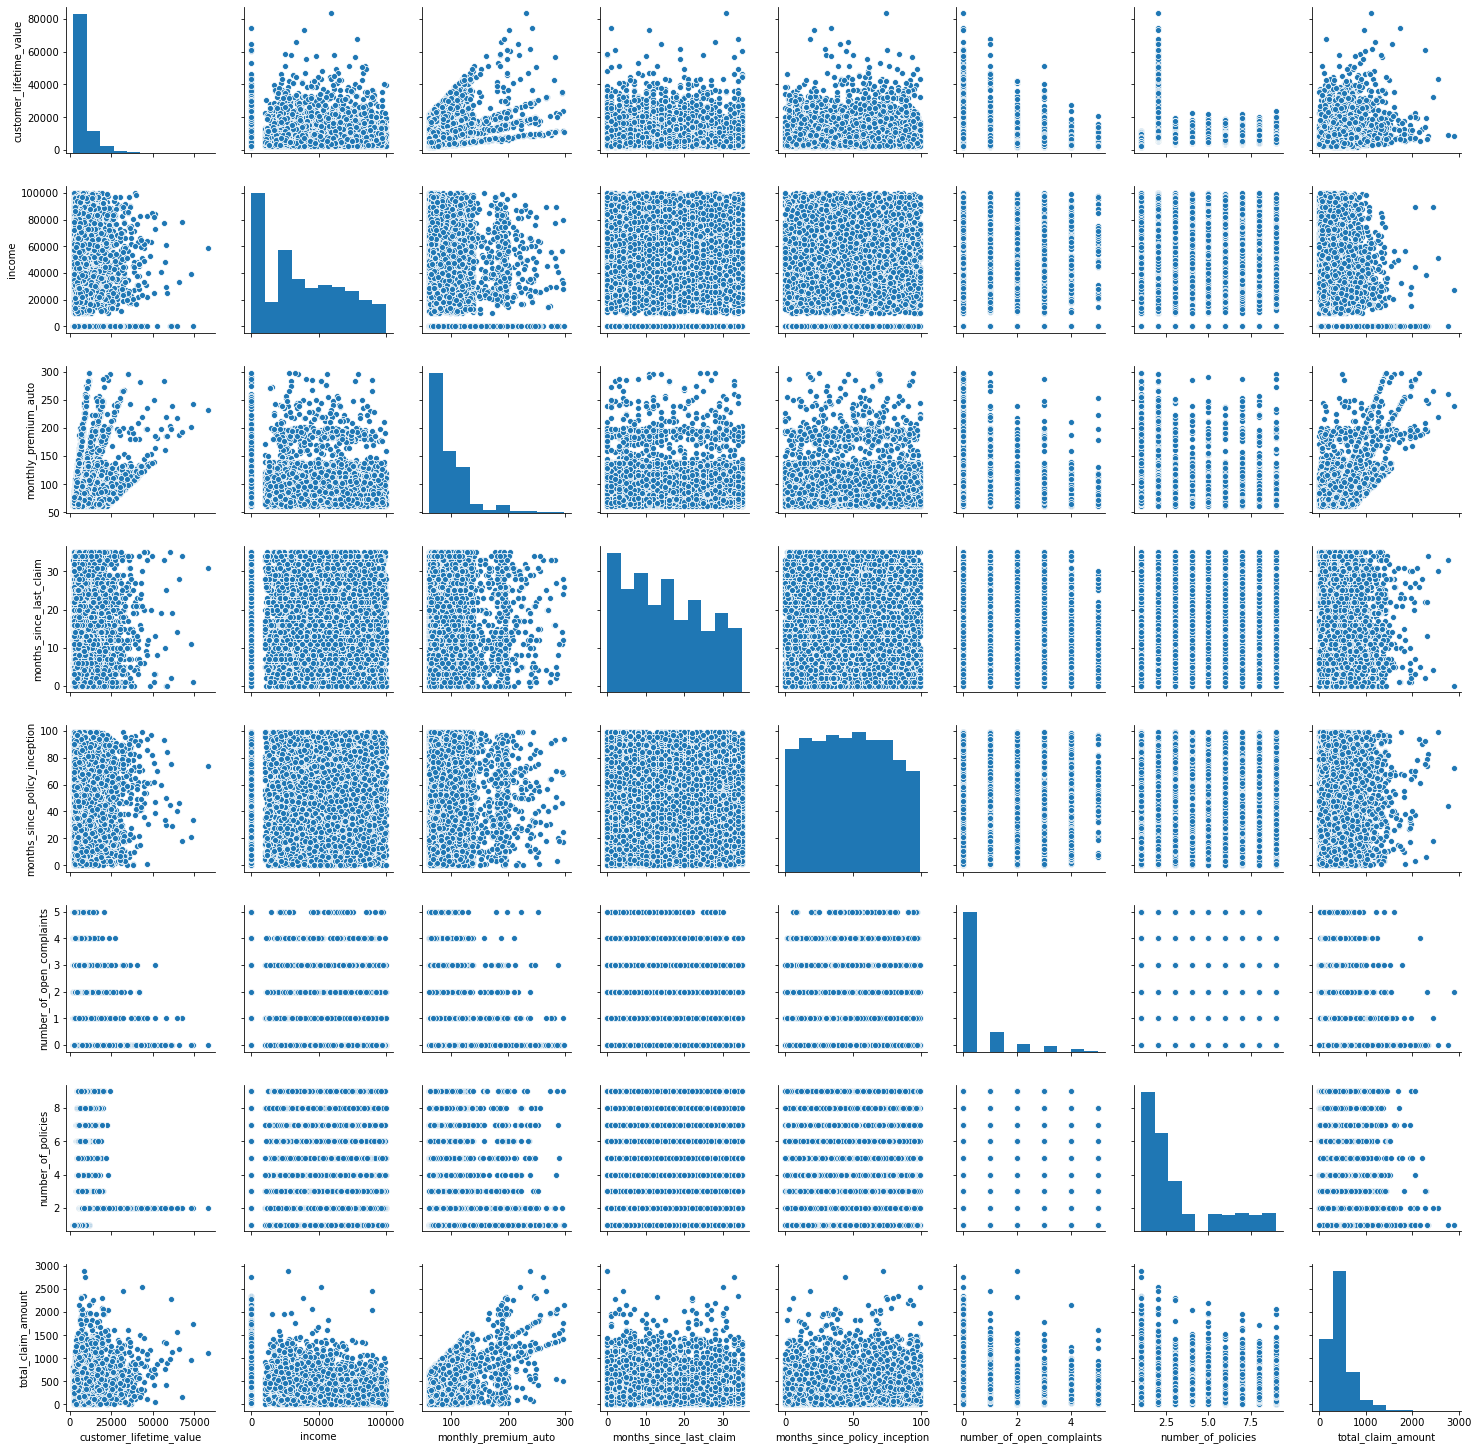

In [24]:
# Check normality
sns.pairplot(data_numeric)
#The other formula is 

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000219AFC2BDC0>,
      dtype=object)

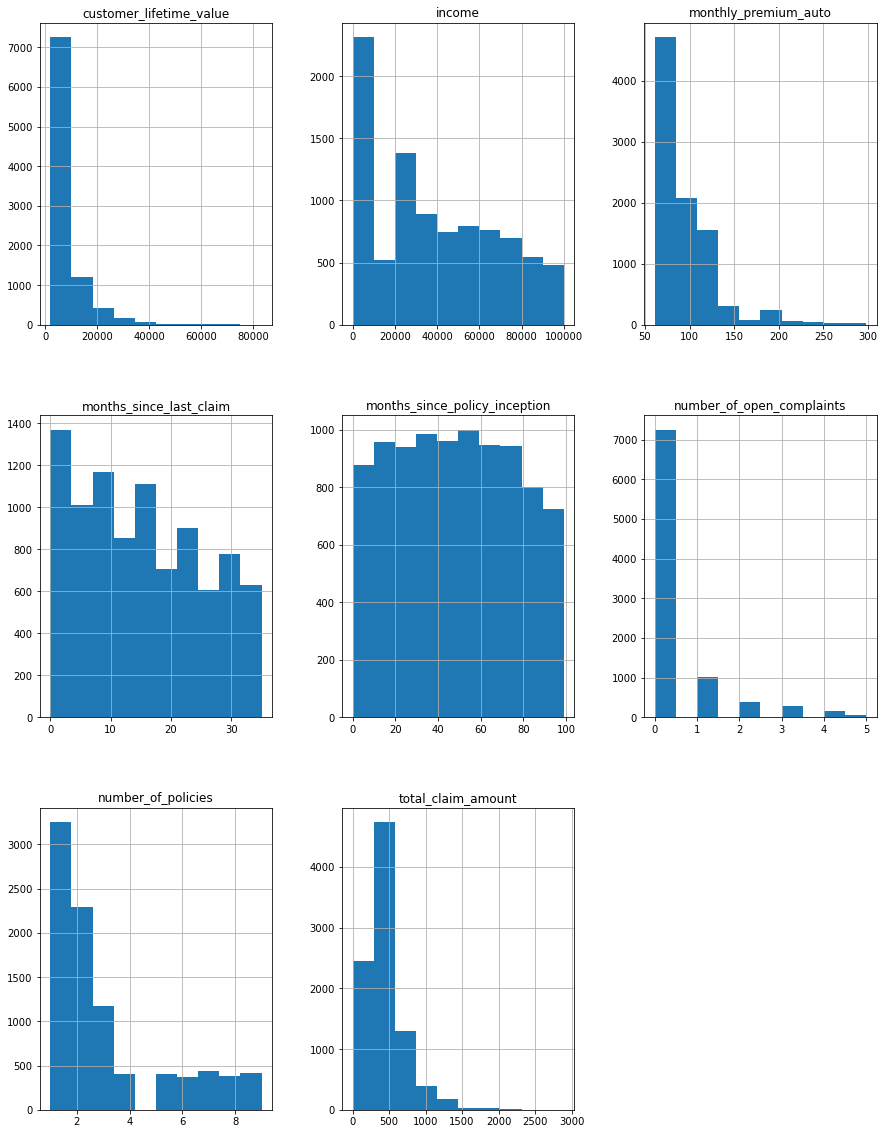

In [27]:
data_numeric.hist(figsize = (15,20))

In [25]:
# Check multicollinearity. General Formula
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score
Y = data_numeric['customer_lifetime_value']
X = data_numeric.drop(['customer_lifetime_value'], axis=1)
lm = linear_model.LinearRegression()
model = lm.fit(X,Y)
lm.score(X,Y)

0.1601631611137262

In [26]:
# Check multicollinearity. General formula
import statsmodels.api as sm
from statsmodels.formula.api import ols
Y = data_numeric['customer_lifetime_value']
X = data_numeric.drop(['customer_lifetime_value'], axis=1)
X = sm.add_constant(X)
model = sm.OLS(Y,X).fit()
print(model.summary())

                               OLS Regression Results                              
Dep. Variable:     customer_lifetime_value   R-squared:                       0.160
Model:                                 OLS   Adj. R-squared:                  0.160
Method:                      Least Squares   F-statistic:                     248.6
Date:                     Thu, 22 Oct 2020   Prob (F-statistic):               0.00
Time:                             17:20:51   Log-Likelihood:                -92862.
No. Observations:                     9134   AIC:                         1.857e+05
Df Residuals:                         9126   BIC:                         1.858e+05
Df Model:                                7                                         
Covariance Type:                 nonrobust                                         
                                    coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------